<a href="https://colab.research.google.com/github/samarthgangurde01/Face-Recognition-and-Drowsiness-Detection/blob/main/Face_Recognition_and_Drowsiness_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Title:- Face Recognition and Drowsiness Detection**

### **What is drowsiness?**
Drowsiness describes the state of being drowsy or sleepy. A person experiencing drowsiness may feel tired or sluggish and have difficulty staying awake. Individuals are usually less alert when drowsy and may fall asleep but are able to be roused.When used by medical professionals, the term drowsiness describes a symptom that may arise from a variety of causes. A person will naturally become drowsy when their body is in need of rest. However, in some cases an individual can experience drowsiness either at inappropriate times or to excess.
Drowsiness is also referred to as somnolence or sleepiness.







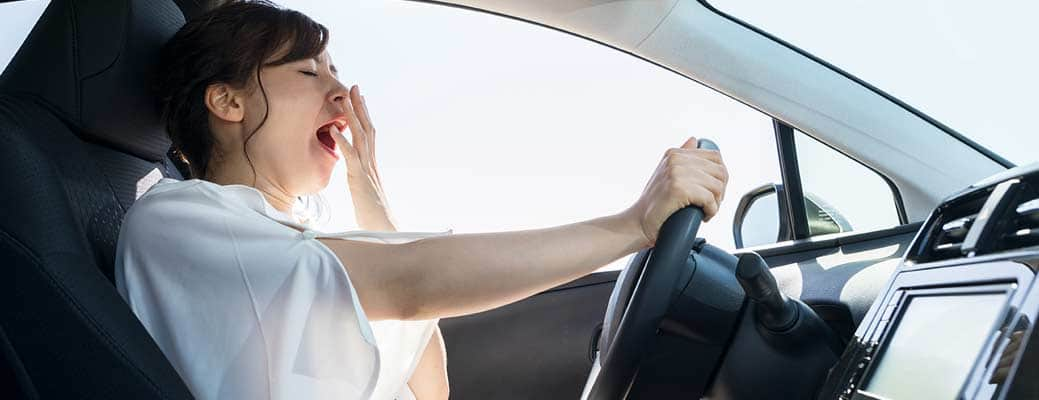

### **Reason behind the project:-**
 Drowsy driving is a major contributor to motor vehicle collisions. According to the National Highway Traffic Safety Administration (NHTSA), in 2017 drowsy driving led to at least 91,000 crashes, resulting in roughly 50,000 injuries and 800 deaths3.This data likely underestimates the impact of drowsy driving because it’s often impossible to definitively determine whether drowsy driving caused an accident, especially after fatal crashes.In light of this, other studies calculate that drowsy driving causes up to 6,000 deadly crashes every year. Researchers estimate that around 21% of fatal car crashes4 involve a person driving while drowsy

You may prefer CDC article published on March 21, 2017 :-https://www.cdc.gov/sleep/about_sleep/drowsy_driving.html

In [ ]:
#importing required libararies 
import tensorflow as tf 
import cv2 
import os
import matplotlib.pyplot as plt
import numpy as np 

### **About MRL dataset we used:-**
the large-scale dataset of human eye images. This dataset contains infrared images in low and high resolution, all captured in various lightning conditions and by different devices. The dataset is suitable for testing several features or trainable classifiers.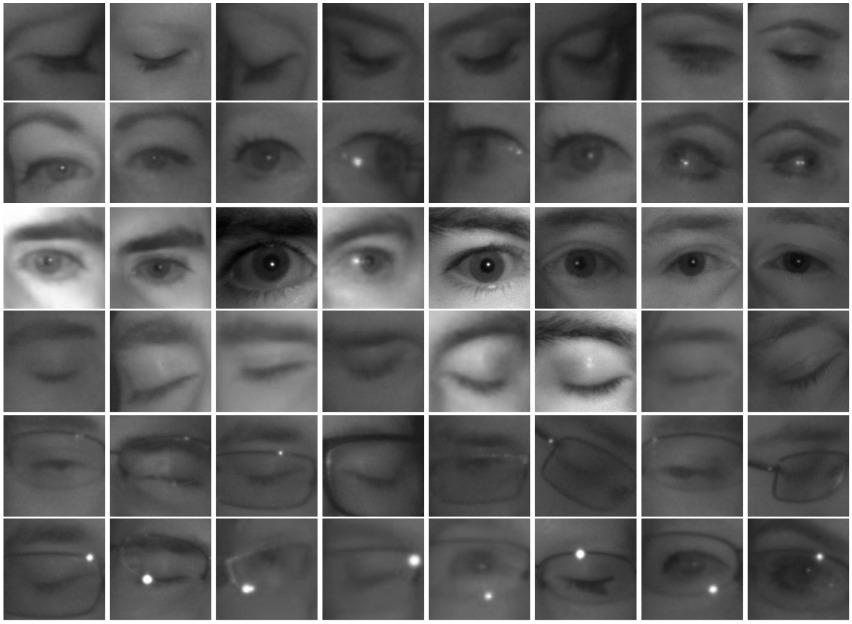
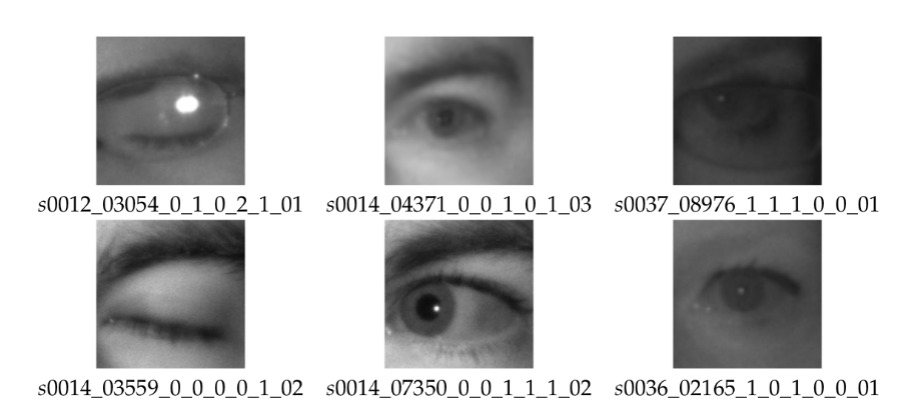

Every Emage in dateset is numbered as S0012_03054_0_1_0_2_1_01
where as 

*  in the dataset, we collected the data of 37 different persons (33 men and 4 women)

* image ID; the dataset consists of 84,898 images

* gender [0 - man, 1 - woman]; the dataset contains the information about gender for each image (man, woman)

* glasses [0 - no, 1 - yes]; the information if the eye image contains glasses is also provided for each image (with and without the glasses)

* eye state [0 - closed, 1 - open]; this property contains the information about two eye states (open, close)

* eflections [0 - none, 1 - small, 2 - big]; we annotated three reflection 

* states based on the size of reflections (none, small, and big reflections)

* lighting conditions [0 - bad, 1 - good]; each image has two states (bad, good) based on the amount of light during capturing the videos


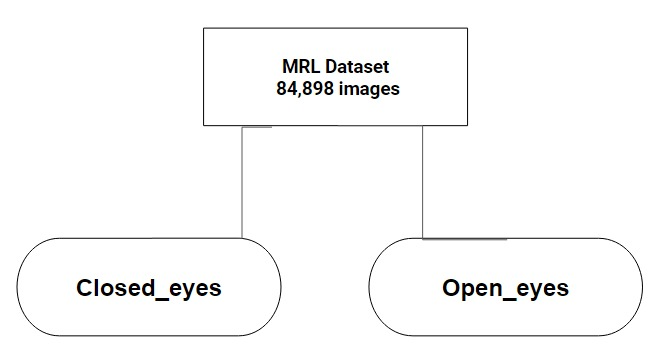

Splitted the whole dataset in two folders as closed_eyes and open_eyes

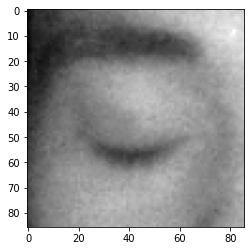

In [ ]:
#plotting first picture of closed eyes dataset 
img_array = cv2.imread("/content/drive/MyDrive/data/EyeDetection/close_eyes/s0001_00001_0_0_0_0_0_01.png", cv2.IMREAD_GRAYSCALE)
plt.imshow(img_array,cmap="gray")

**After importing dataset we displayed the first image of Closed eyes which is in  86*86 pixels size**

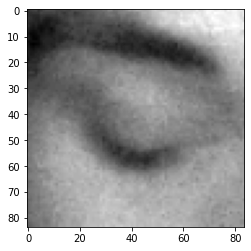

In [ ]:
#Creating path to import all the images from from Closed_eys and Open_eyes 
Datadirectory = "/content/drive/MyDrive/data/EyeDetection" 
Classes = ["close_eyes","open_eyes"]
for category in Classes:
    path = os.path.join(Datadirectory, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break    

**Displayed image after creating path Opened_eyes and Closed_eyes**

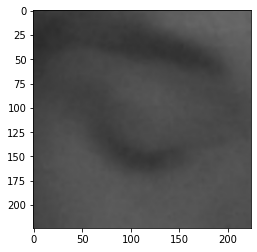

In [ ]:
#changing image size to 224
img_size= 224
new_array= cv2.resize(backtorgb, (img_size, img_size))
plt.imshow(new_array)
plt.show()

**To choose a good image size it is important to note that a bigger image sizes will give you better accuracy normally. However all the filter take longer and the memory requirements rise with the image size. Additionally larger sizes yield diminishing improvements. we normally used 224x224**

In [ ]:
#resizing all images of dataset to 224
training_Data = []

def create_training_Data():
    for category in Classes:
        path = os.path.join(Datadirectory, category)
        class_num = Classes.index(category)
        for img in os.listdir(path):
            try:
                img_array= cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                backtorgb= cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
                new_array= cv2.resize(backtorgb, (img_size,img_size))
                training_Data.append([new_array,class_num])
            except Exception as e:
                pass

**Here we changed the shape of all the images we had 86*-86pixels to 224*-224pixels**

In [ ]:
#Calling create_training_Data function 
create_training_Data()

In [ ]:
#printing length of dataset 
print(len(training_Data))

3212


**Here we printed length of training data which we gone use for further process**  

In [ ]:
#Shuffling all the images of training data 
import random
random.shuffle(training_Data)


**Random shuffling of data is a standard procedure in all image classification problems it cannt be  an exception its purpose is to break possible biases during data preparation - e.g. putting all the closed_eyes images first and then the open_eyes ones in a closed_eye/opened_eyes classification dataset.**

In [ ]:
#Adding all the features in x and labels in Y
X = []
y = []

for features,label in training_Data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, img_size, img_size, 3)

**Here we asign all the features in X and all the labels in Y, converted our X variable array  so we can feed them to model for model traing**

In [ ]:
#Cheaking shape of X
X.shape

(3212, 224, 224, 3)

### **Normalization**

 pixel acts as a variable, range of this variable is expressed in terms of an integer value to describe its brightness. A value of “0” means the pixel is white in colour, a value of “255” means the pixel in black in colour. All possible values in between are different shades of transformation between white to dark, depending on the magnitude of the integer value.
To normalize, the scale is reduced from 0–255 to 0–1. It is done by dividing each pixel valued by 255 and the resultant value will be a value between 0 to 1. This technique of normalization of input image was followed extensively in all DL frameworks.

In [ ]:
#Normalising X by deviding 255
X= X/255.0;

In [ ]:
#converting Y to array type
Y= np.array(y)

### **MobileNet:-**
As the name applied, the MobileNet model is designed to be used in mobile applications, and it is TensorFlow’s first mobile computer vision model.
MobileNet uses depthwise separable convolutions. It significantly reduces the number of parameters when compared to the network with regular convolutions with the same depth in the nets. This results in lightweight deep neural networks.
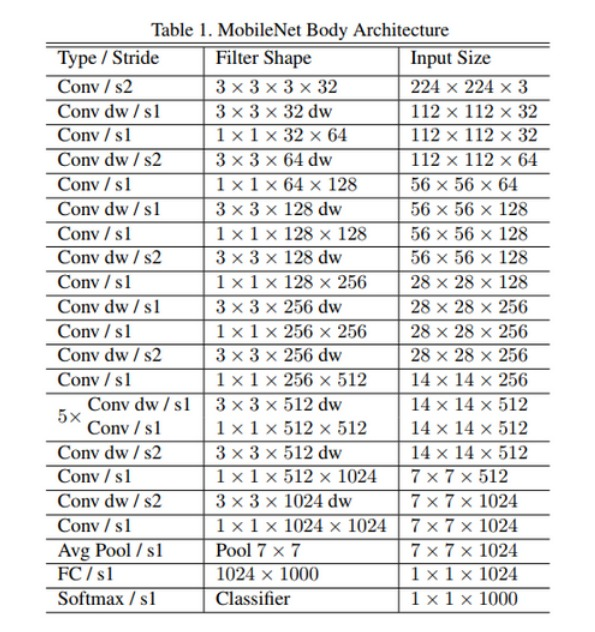

The MobileNet was proposed as a deep learning model by Andrew G. Howard et al of Google Research team in their research work entitled “MobileNets: Efficient Convolutional Neural Networks for Mobile Vision Applications”. This model was proposed as a family of mobile-first computer vision models for TensorFlow, designed to effectively maximize accuracy while being mindful of the restricted resources for an on-device or embedded application. MobileNets are small, low-latency, low-power models parameterized to meet the resource constraints of a variety of use cases. They can be built upon for classification, detection, embedding and segmentation similar to how other popular large scale models.


In [ ]:
#importing required libararies 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
#Asinging MobileNet as our model 
model=tf.keras.applications.mobilenet.MobileNet()

17235968/17225924 [==============================] - 1s 0us/step


**Here we imported mobilenet and asigned it to the model variable** 

In [ ]:
#Printing summary of model 
model.summary()

**This is how our mobile net summary look like in which it uses a 4,253,864 Total params and 4,231,976 Trainable params**

In [ ]:
#here we assigned input to base_input+-
base_input = model.layers[0].input

In [ ]:
#here we assigned output to base_output
base_output = model.layers[-4].output

### **Sigmoid function:-**
The sigmoid function is a mathematical function that has a characteristic that can take any real value and map it to between 0 to 1 shaped like the letter “S”. The sigmoid function is also known as a logistic function.

Y = 1 / 1+e -z

The Sigmoid function S curve
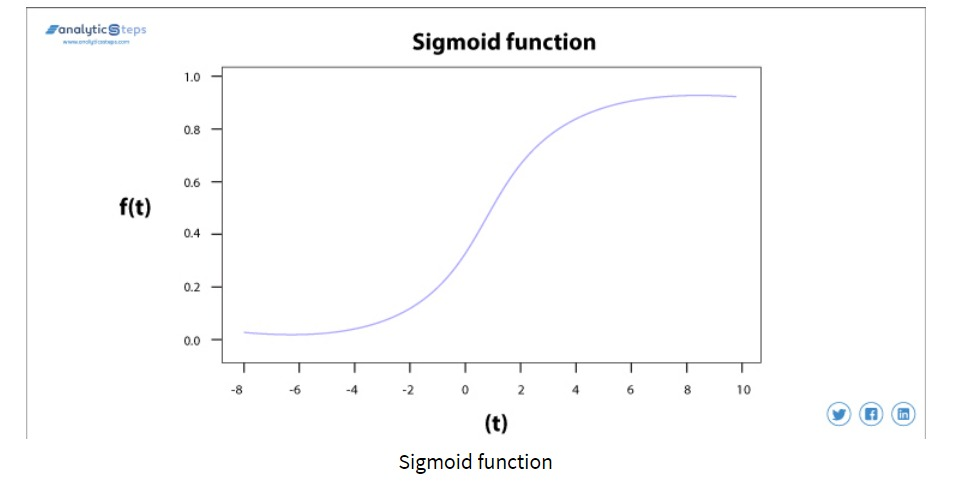


If the value of z goes up to positive infinity, then the predicted value of y will become 1. But if the value of z goes down to negative infinity, then the predicted value of y will become 0.If the outcome of the sigmoid function is greater than 0.5 then you would classify that label to be class 1 or positive class and if it is less than 0.5 then you would classify it to be a negative class or label it as class 0.The Sigmoid function performs the role of an activation function in machine learning which is used to add non-linearity in a machine learning model. Basically, the function determines which value to pass as output and what not to pass as output

In [ ]:
#Asinging Flat layer and final output
Flat_layer= layers.Flatten()(base_output)
final_output = layers.Dense(1)(Flat_layer)
final_ouput = layers.Activation('sigmoid')(final_output)

**Here we used flattening as the result of these cnn and pooling into a one-dimensional vector.after the flattening step is that you end up with a long vector of input data that you then pass through the artificial neural network to have it processed further**.

In [ ]:
#With assigning input and output we created out first model
new_model = keras.Model(inputs = base_input, outputs= final_output)

In [ ]:
#Printing summary of model after assigning the new layers
new_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

### **Adam Optimiser**
It is an optimization algorithm that can be used instead of the classical stochastic gradient descent procedure to update network weights iterative based in training data.Adam was presented by Diederik Kingma from OpenAI and Jimmy Ba from the University of Toronto in their 2015 ICLR paper titled Adam: A Method for Stochastic Optimization.The algorithm is called Adam. It is not an acronym and is not written as ADAM.the name Adam is derived from adaptive moment estimation.Stochastic gradient descent maintains a single learning rate for all weight updates and the learning rate does not change during training.
A learning rate is maintained for each network weight and separately adapted as learning unfolds.The method computes individual adaptive learning rates for different parameters from estimates of first and second moments of the gradients

 The authors describe Adam as combining the advantages of two other extensions of stochastic gradient descent.

* Specifically Adaptive Gradient Algorithm that maintains a per-parameter learning rate that improves performance on problems with sparse gradients.

* Root Mean Square Propagation that also maintains per-parameter learning rates that are adapted based on the average of recent magnitudes of the gradients for the weight . This means the algorithm does well on online and non-stationary problems .

In [ ]:
#Compiling to new model 
new_model.compile(loss="binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

**We compiled our newly formed model by using loss function binary crossentropy optimiser adam and metrics accuracy**

In [ ]:
#Fitting X and Y to our model 
new_model.fit(X,Y,epochs =32,validation_split=0.1)

Epoch 1/32
91/91 [==============================] - 45s 340ms/step - loss: 1.9243 - accuracy: 0.8633 - val_loss: 3.8853 - val_accuracy: 0.7236
Epoch 2/32
91/91 [==============================] - 30s 327ms/step - loss: 0.6424 - accuracy: 0.9554 - val_loss: 0.7804 - val_accuracy: 0.9161
Epoch 3/32
91/91 [==============================] - 29s 322ms/step - loss: 0.5369 - accuracy: 0.9637 - val_loss: 0.4566 - val_accuracy: 0.9627
Epoch 4/32
91/91 [==============================] - 29s 318ms/step - loss: 0.8807 - accuracy: 0.9391 - val_loss: 1.8338 - val_accuracy: 0.8758
Epoch 5/32
91/91 [==============================] - 29s 318ms/step - loss: 0.6295 - accuracy: 0.9574 - val_loss: 1.5576 - val_accuracy: 0.8882
Epoch 6/32
91/91 [==============================] - 30s 326ms/step - loss: 1.3922 - accuracy: 0.9083 - val_loss: 0.8647 - val_accuracy: 0.9410
Epoch 7/32
91/91 [==============================] - 29s 320ms/step - loss: 0.5458 - accuracy: 0.9633 - val_loss: 0.6698 - val_accuracy: 0.9534

**Here we used 10 epochs (10 ittretion) on our model in starting it gave us accuracy of 0.57 which was not that good but after three ittretions it increased to more than 89% and in last epoch it gave us accuracy uptp 0.88 was preety good for tring actual prediction and deployment of the model**  

In [ ]:
new_model.save('Eyemodel1.h5')

In [ ]:
# saved our model as new_model
new_model =tf.keras.models.load_model('Eyemodel1.h5')

**We saved model so we can create streamlit app in further process to use it there for deployment** 

## **Prediction Section**
We created this section to examine how our models responds after feeding actual image to it.. and here we gooo! 

In [ ]:
#importing image to cheak prediction 
img_array = cv2.imread('/content/drive/MyDrive/data/EyeDetection/s0001_01853_0_0_1_0_0_01.png', cv2.IMREAD_GRAYSCALE)
backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
new_array = cv2.resize(backtorgb, (img_size,img_size))

**Image we imported was from test dataset to obeserv the result of our model** 

In [ ]:
#Resizing imported images 
X_input = np.array(new_array).reshape(1, img_size, img_size, 3)

**As image was in 86*86 pixel we converted it img_size which is 224*224 and converted it into array to feed our model**

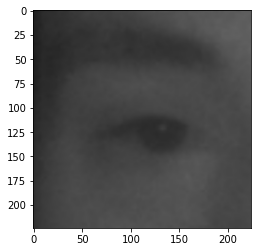

In [ ]:
#Plotting our image
plt.imshow(new_array)


**This is how our image look like after converting it into 224*224 pixels**

In [ ]:
#Normalising image
X_input=X_input/255.0

**Normalising image by deviding it with 255 to scale down it from 0-1**

In [ ]:
#Predicting for the image
prediction = new_model.predict(X_input)

**Now by using our imported image and with our model we gone predict value** 

In [ ]:
prediction

array([[19.061186]], dtype=float32)

**As here you can see the value is positive this means our image belongs to open_eyes dataset when it shows negative values that means our model predicting it as closed_eyes image.example** 


**if value:- 32.76**

**thats mean- image is Opened eye image** 

**if value:- -12.23**

**thats mean- image is Closed eye image** 

## **Deployment:-**

### **OpenCV:-**
OpenCV is the huge open-source library for the computer vision, machine learning, and image processing and now it plays a major role in real-time operation which is very important in today’s systems. By using it, one can process images and videos to identify objects, faces, or even handwriting of a human. When it integrated with various libraries, such as NumPy, python is capable of processing the OpenCV array structure for analysis. To Identify image pattern and its various features we use vector space and perform mathematical operations on these features.

**Applications of OpenCV:**
* face recognition
* Automated inspection and surveillance
* number of people – count (foot traffic in a mall, etc)
* Vehicle counting on highways along with their speeds
* Street view image stitching
* Video/image search and retrieval
* Robot and driver-less car navigation and control
object recognition
* Medical image analysis
* Movies – 3D structure from motion
* TV Channels advertisement recognition


**OpenCV Functionality** 
* Image/video I/O, processing, display (core, imgproc, highgui)
* Object/feature detection (objdetect, features2d, nonfree)
* Geometry-based monocular or stereo computer vision (calib3d, stitching, videostab)
* Computational photography (photo, video, superres)
* Machine learning & clustering (ml, flann)
* CUDA acceleration (gpu)

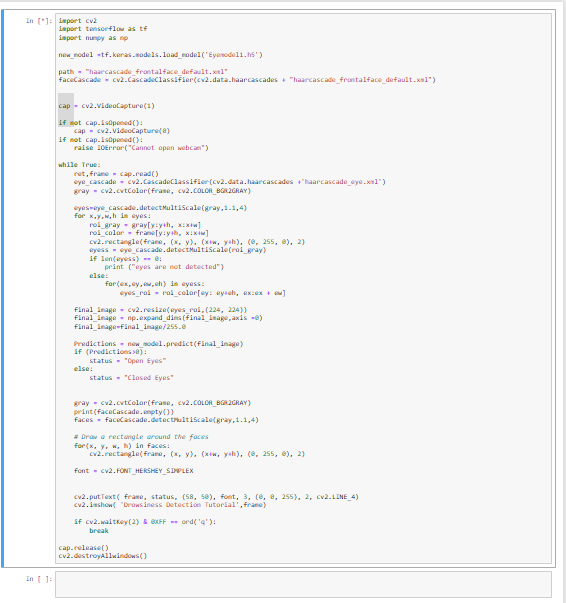


**first we loaded the model by using keras, assigned the haar cascades files,started capturing vedio by cv2 vediocapture in the frame by cv2.then by using haar cascade files we started detecting the shape of face and eyes.further we resized the image of eyes detected by haar cascade normalised the image and then passed to our imported model. for prediction if values is negative assigned it closed eyes and if value is positive assigned it with open eyes when we runned the loop we got our results** 


## **Conclusion:-**
   **Detectionion of driver drowsiness is a crucial problem in advanced driver assistance systems, because around 22–24% of road accidents are caused by driver being sleepy. A drowsiness detection solution should be very accurate and run in real-time. All the existing deep learning solutions for drowsiness detection are computationally intensive and cannot be easily implemented on embedded devices in this project we used MRL Dataset we started our project by importing our dataset we divided all the image in opened_eye and closed_eyes category for our easy understanding and displayed some of them,As we had images of 86-86 pixels we converted them to 225-225 pixels for feeding our model.then further we assigned all the features in X variable and all the labels in Y variable. then we normalised the X-variable by dividing it 255 so we can scale down it to 0-1 values further we moved to model training where we used mobile net as our algorithm with adam optimiser and sigmoid function which us lowest as accuracy 57% and highest accuracy as 88%, coming to or prediction system we imported opened eyes image for prediction and it gave us positive value as 23.87 that means image belongs Open_eyes category after creating model we moved toword the deployment where by using open cv we started capturing image and with the use of haar cascade file detected the shape of face and eyes and after preprocessing image our model predicted us the values positive and negative  for opend_eyes and Closed_eyes**